# Discuss about the curse of dimensionality

## Introduction

The Curse of Dimensionality refers to problems that arise when working with data in high-dimensional spaces. *Figure 1* illustrates this problem in case of the incremental number of dimension:

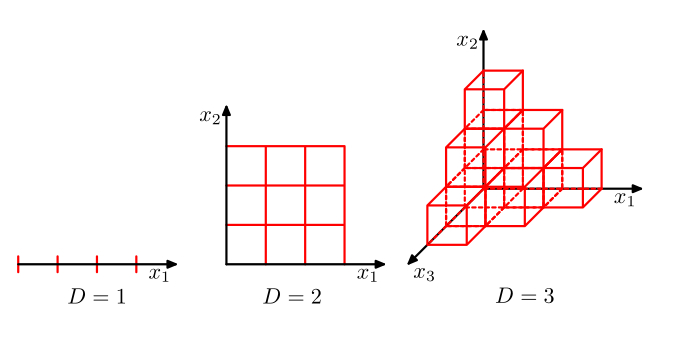

*Figure 1: Illustration of the curse of dimensionality, showing how the number of regions of a regular grid grows exponentially with the dimensionality $D$ of the space. For clarity, only a subset of the cubical regions are shown for $D = 3$*

Particularly, as the number of dimensions $D$ increases, the space becomes exponentially larger. Imagine dividing the space into small cells, where each cell could contain some data points. In a one-dimensional space ($D=1$), dividing it into cells is straightforward, like cutting a line into segments. In two dimensions ($D=2$), it's like dividing a plane into squares. But as the number of dimensions increases, the number of cells increases exponentially. For example, if you have $10$ divisions per dimension, a 1D space has $10$ cells, a 2D space has $100$ cells, and a 3D space has $1000$ cells.

Now, if the data is sparse (spread out) in these cells, many cells might not contain any data at all, or contain only a few data points. This creates a major problem for machine learning models because they rely on having enough data in each region of the space to make accurate predictions. When the data is spread too thin across many dimensions, the models struggle to generalize well because they don't have enough data in each part of the space to learn meaningful patterns. For example, in a 10-dimensional space, data points are scattered throughout a vast volume, making it unlikely that any two points are close to each other. This sparsity weakens the reliability of nearest-neighbor approaches and increases the risk of overfitting as models struggle to generalize from few, isolated samples.

This sparsity is the core of the Curse of Dimensionality, making it harder for machine learning models to work effectively as dimensions increase.

We will practice the following example with noting that the volume of a sphere of radius $r$ in $D$ dimensions must scale as $r^D$, and so we write $V_D(r) = K_D r^D$ where $K_D$ is a constant that depends on the dimension $D$. Thus the fraction of the volume of the sphere that lies between radius $r = 1 - \epsilon$ and $r = 1$ based on relative error as follows:

$$\frac{V_D(1) - V_D(1 - \epsilon)}{V_D(1)} = 1 - (1 - \epsilon)^D$$

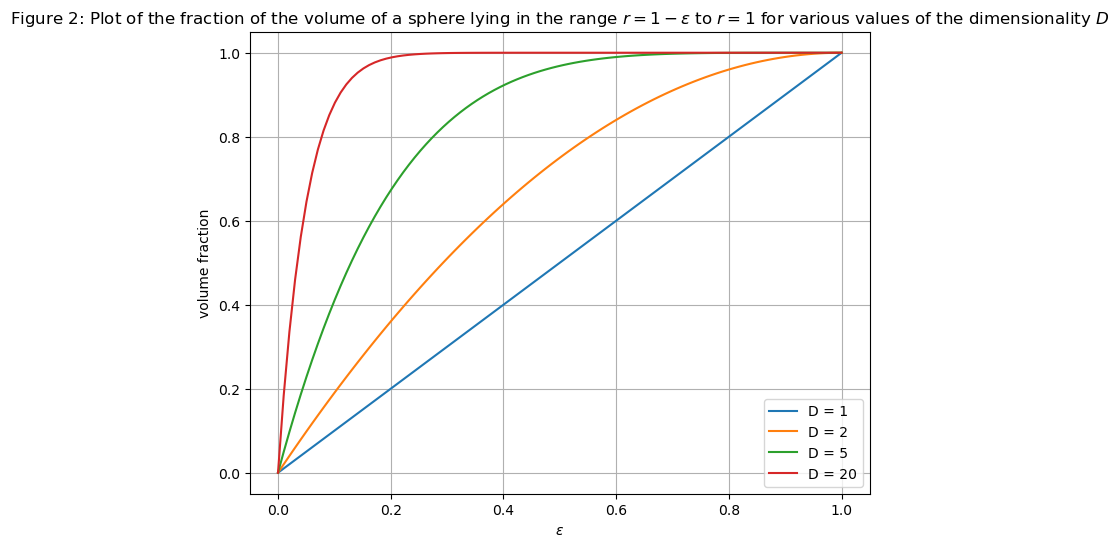

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Values for epsilon and dimensionality D
epsilon = np.linspace(0, 1, 100)
D_values = [1, 2, 5, 20]

# Function to calculate the volume fraction
def volume_fraction(epsilon, D):
    return 1 - (1 - epsilon)**D

# Plotting the figure
plt.figure(figsize=(8,6))

for D in D_values:
    plt.plot(epsilon, volume_fraction(epsilon, D), label=f'D = {D}')

plt.xlabel(r'$\epsilon$')
plt.ylabel('volume fraction')
plt.title(r'Figure 2: Plot of the fraction of the volume of a sphere lying in the range $r = 1-\epsilon$ to $r = 1$ for various values of the dimensionality $D$')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

We can see that, in *Figure 2*, the dimension $D$ increases, most of the volume of the sphere is located near the surface. This suggests that the data in high-dimensional space is not uniformly distributed, but rather concentrated at the edges of the space, which reduces the significance of distance measures such as Euclidean distance. As data points become sparse in large spaces, it becomes more difficult to identify patterns or groups in the data. Many machine learning algorithms rely on distance metrics (like Euclidean distance) that lose effectiveness in high-dimensional spaces. In low-dimensional spaces, distance measures are meaningful, but in high dimensions, all points can become almost equidistant from each other, reducing the effectiveness of algorithms that depend on nearest-neighbor calculations.

With each additional dimension, the complexity of fitting models increases. Polynomial models, for example, require an increasing number of coefficients, and capturing interactions between features demands even more data, making models computationally intensive and harder to train effectively.

## Impact on Machine Learning Models

### Reduced Model Performance and Generalization

In a classification task using the k-Nearest Neighbors (k-NN) algorithm, the Euclidean distance metric becomes less meaningful in high-dimensional spaces, as most points are equidistant from each other. This undermines the effectiveness of k-NN, resulting in incorrect or inconsistent predictions.

### Difficulty in Finding Meaningful Patterns

Regression algorithms, like Linear or Polynomial Regression, require substantial data to capture relationships among input features in high-dimensional spaces. Without enough data, models are prone to noise, learning incorrect relationships that don’t represent the true underlying patterns.

### Increased Computational Complexity

The number of parameters a model needs to learn grows rapidly as dimensionality increases, leading to higher computational complexity, memory requirements, and slower training and prediction times. For instance, a model operating in a 1000-dimensional space requires considerably more computational power and time than one in a 10-dimensional space.

### Increased Risk of Overfitting

The curse of dimensionality increases the likelihood of overfitting because, in high-dimensional spaces, models can easily find boundaries or relationships to classify training data with high accuracy. However, these boundaries may not reflect the true data structure, leading to errors on new data. For instance, in an image classification task with thousands of dimensions (pixels), a neural network might learn features specific to each training image rather than general features of the image class.

### Challenges with Distance Metrics

Many machine learning algorithms, such as k-NN, SVM, and clustering methods, rely on distance metrics. In high-dimensional spaces, however, distances between points become almost uniform, rendering distance metrics ineffective. For clustering tasks, the curse of dimensionality makes identifying clusters more challenging. Algorithms like k-means may lose effectiveness as data points become equidistant from each other, making cluster centroids less representative of any particular group of points.

# Apply Dimensionality Reduction Techniques

## Data Loading and Preprocessing

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) =  tf.keras.datasets.fashion_mnist.load_data()

2024-10-28 18:39:37.808455: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-28 18:39:37.908104: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-28 18:39:37.999467: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730115578.080187   79866 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730115578.103941   79866 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 18:39:38.292994: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [69]:
print(f"Train set shape: {X_train.shape, y_train.shape}\nTest set shape: {X_test.shape, y_test.shape}")

Train set shape: ((60000, 28, 28), (60000,))
Test set shape: ((10000, 28, 28), (10000,))


In [5]:
X_train: np.ndarray = X_train.reshape(X_train.shape[0], 784)
X_test: np.ndarray = X_test.reshape(X_test.shape[0], 784)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

## Visualizing the mean representation of each class

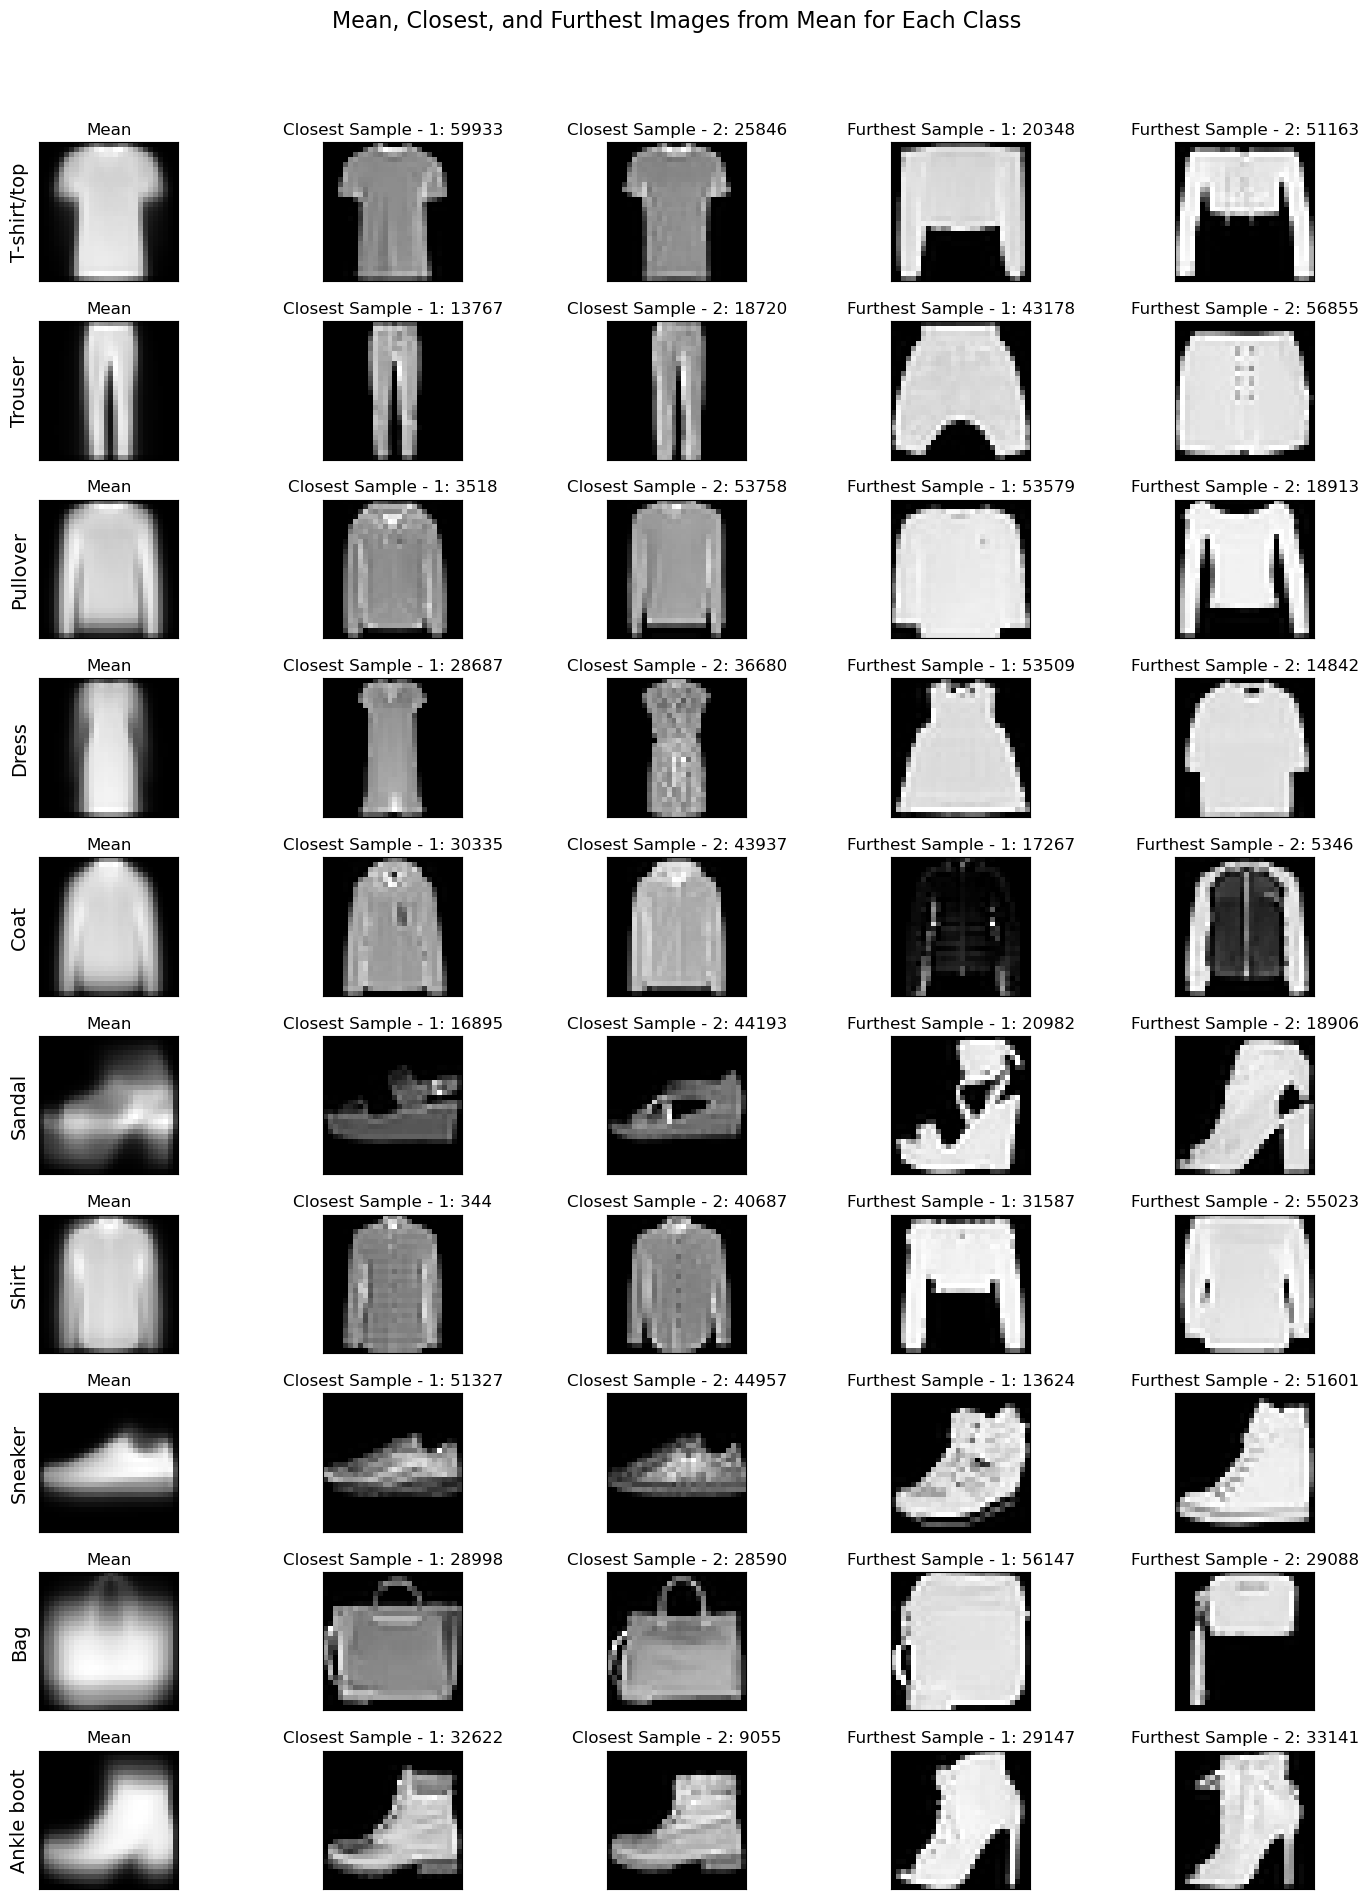

In [25]:
from scipy.spatial import distance

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(10, 5, figsize=(15, 20))
fig.suptitle('Mean, Closest, and Furthest Images from Mean for Each Class', fontsize=16)

for i, label in enumerate(np.unique(y_train)):
    class_images = X_train[y_train == label]
    mean_image = class_images.mean(axis=0)
    
    # Compute distances from each image in the class to the mean
    distances = np.array([distance.euclidean(mean_image, img) for img in class_images])
    
    # Get indices for the closest and furthest images
    closest_indices = distances.argsort()[:2]
    furthest_indices = distances.argsort()[-2:]
    
    # Plot mean image
    axes[i, 0].imshow(mean_image.reshape(28, 28), cmap='gray')
    axes[i, 0].set_title("Mean")
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])
    axes[i, 0].set_ylabel(class_names[label], fontsize=14)
    
    # Plot the closest images with sample IDs
    for j, idx in enumerate(closest_indices):
        axes[i, j+1].imshow(class_images[idx].reshape(28, 28), cmap='gray')
        axes[i, j+1].set_title(f"Closest Sample - {j+1}: {np.where(y_train == label)[0][idx]}")
        axes[i, j+1].set_xticks([])
        axes[i, j+1].set_yticks([])
    
    # Plot the furthest images with sample IDs
    for j, idx in enumerate(furthest_indices):
        axes[i, j+3].imshow(class_images[idx].reshape(28, 28), cmap='gray')
        axes[i, j+3].set_title(f"Furthest Sample - {j+1}: {np.where(y_train == label)[0][idx]}")
        axes[i, j+3].set_xticks([])
        axes[i, j+3].set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Applying PCA for Dimensionality Reduction

In [6]:
from sklearn.decomposition import PCA

X_train_scaled_copy = X_train_scaled.copy()

# Fit PCA
pca = PCA()
pca.fit(X_train_scaled_copy)

print(f"First 10 PCs: {pca.explained_variance_[:10]}")

First 10 PCs: [173.13789644 113.01260323  42.81633652  39.89596074  31.79084015
  23.67336435  21.54106703  18.13934684  13.27049633  10.33363286]


In [7]:
print(f"Explained variance ratio of first 10 PCs: {pca.explained_variance_ratio_[:10]}")

Explained variance ratio of first 10 PCs: [0.22083547 0.14414633 0.05461176 0.05088686 0.04054887 0.03019511
 0.02747539 0.02313654 0.01692637 0.01318043]


In [11]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the smallest K such that cumulative variance >= 0.99
K = np.argmax(cumulative_variance >= 0.99) + 1

print(f"Number of dimensions K to retain 99% of the variance: {K}")

Number of dimensions K to retain 99% of the variance: 527


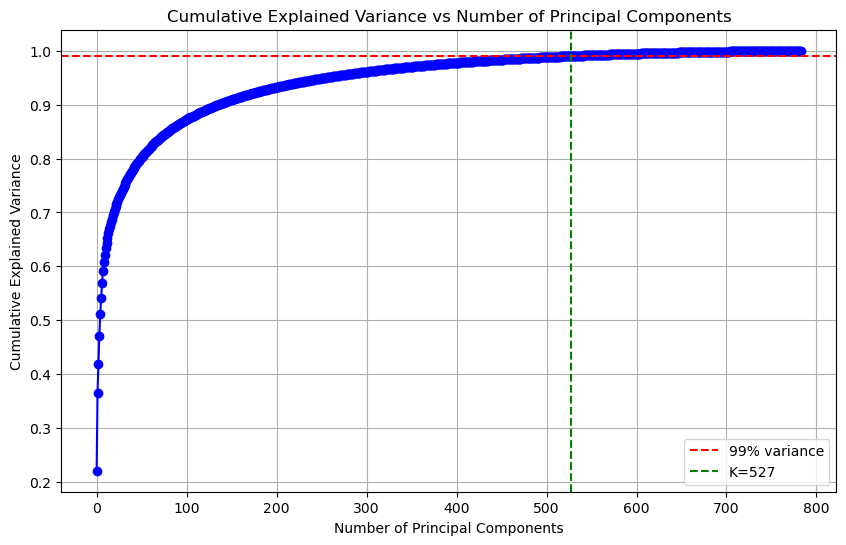

In [12]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.axhline(y=0.99, color='r', linestyle='--', label='99% variance')
plt.axvline(x=K, color='g', linestyle='--', label=f'K={K}')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
print(f"Cumulative explained variance at K=100: {cumulative_variance[99]}")

Cumulative explained variance at K=100: 0.8715402148875269


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Train set shape after PCA: {X_train_pca.shape}\nTest set shape after PCA: {X_test_pca.shape}")

Train set shape after PCA: (60000, 100)
Test set shape after PCA: (10000, 100)


In [8]:
np.save('X_train_pca.npy', X_train_pca)
np.save('X_test_pca.npy', X_test_pca)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

## Visualizing the reduced dimensionality data

(784, 100)


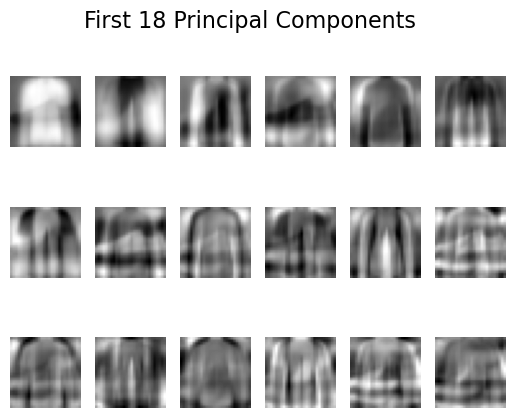

In [19]:
U_K = pca.components_.T # U_K is a matrix whose columns are the eigenvectors
print(U_K.shape)

plt.suptitle('First 18 Principal Components', fontsize=16)
for row in range(18):
    plt.subplot(3, 6, row + 1)
    plt.axis('off')
    plt.imshow(U_K[:, row].reshape(28, 28), cmap='gray')

After dimensionality reduction, the training set takes up much less space. For example, after applying PCA to the Fashion-MNIST dataset while preserving $\approx 87 \%$ of its variance, we are left with $100$ features, instead of the original $784$ features. So the dataset is now less than $\approx 12.76 \%$ of its original size, and we only lost $\approx 13 \%$  of its variance.

It is also possible to decompress the reduced dataset back to $784$ dimensions by applying the inverse transformation of the PCA projection. This won't give us back the original data, since the projection lost a bit of information (within the $13 \%$ variance that was dropped), but it will likely be close to the original data.

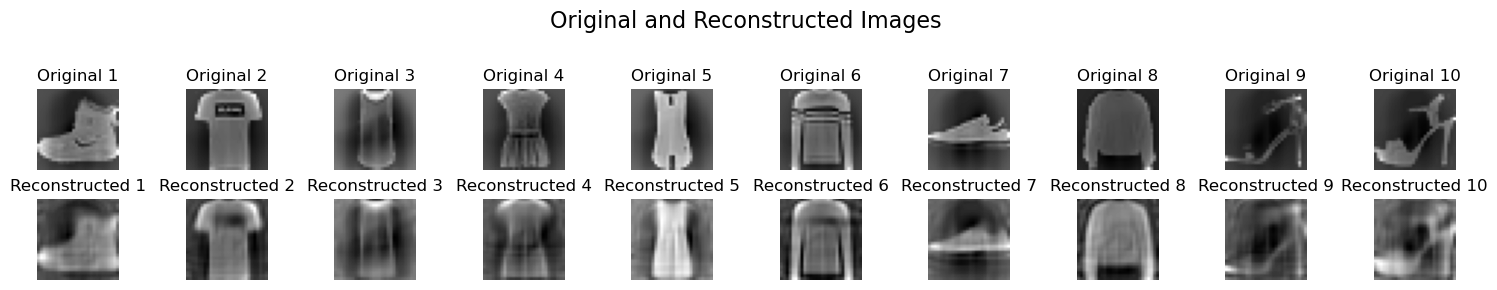

In [85]:
# Reconstruct the images
X_train_reconstructed = pca.inverse_transform(X_train_pca)
X_test_reconstructed = pca.inverse_transform(X_test_pca)

fig, axes = plt.subplots(2, 10, figsize=(15, 3))
fig.suptitle('Original and Reconstructed Images', fontsize=16)

for i in range(10):
    axes[0, i].imshow(X_train_scaled[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f"Original {i+1}")
    axes[0, i].axis('off')
    
    axes[1, i].imshow(X_train_reconstructed[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f"Reconstructed {i+1}")
    axes[1, i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Retrain the Model

## Logistic Regression

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, log_loss

X_train_pca = np.load('X_train_pca.npy')
X_test_pca = np.load('X_test_pca.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

log_reg = LogisticRegression(max_iter=10000)

kf = KFold(n_splits=3, shuffle=True, random_state=42)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_pca)):
    print(f"Fold {fold + 1}")
    
    X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    log_reg.fit(X_train_fold, y_train_fold)
    
    y_train_pred = log_reg.predict(X_train_fold)
    y_val_pred = log_reg.predict(X_val_fold)
    
    train_loss = log_loss(y_train_fold, y_train_pred)
    train_accuracy = accuracy_score(y_train_fold, y_train_pred)
    
    val_loss = log_loss(y_val_fold, y_val_pred)
    val_accuracy = accuracy_score(y_val_fold, y_val_pred)
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

print(f"\nAverage Train Loss: {np.mean(train_losses):.4f}")
print(f"Average Val Loss: {np.mean(val_losses):.4f}")
print(f"Average Train Accuracy: {np.mean(train_accuracies):.4f}")
print(f"Average Val Accuracy: {np.mean(val_accuracies):.4f}")

Fold 1


KeyboardInterrupt: 